<a href="https://colab.research.google.com/github/AnkanaSonowal/Opinion-Based-Community-Detection-in-Online-Social-Networks/blob/main/Create_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import csv
import numpy as np
import pandas as pd
from textblob import TextBlob

In [ ]:
consumer_key = 'RNBUUEtazKVJemcMedGHWgMCV'
consumer_secret = 'zILQDS386Dd4WRr8810gD5WAGbfkeVRDT3BYWs7RKChY1U7duM'
access_token = '893345180958564352-UT4mqHeDQyYllebzbsIPItOCyjHs8eP'
access_secret = 'Gv2pbj6eeKvKPWjbePfO71la7xOeib2T5lV4SaL86UUdj'
user_data ={ 'user_id' : [],
             'retweet_count' : [],
    'user_mention_count' : [],
    'followers_count' : [],
     'convincing_power':[],
            'bias' :[]   }
def get_all_tweets(uid):
   #Twitter only allows access to a users most recent 3240 tweets with this method
   
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth,wait_on_rate_limit=True)
    #     user = api.get_user(screen_name)
    #     for mentions in tweepy.Cursor(api.mentions_timeline,id=screen_name).items():
    #     # process mentions here
    #         print(mentions.text)
    #         print("\n")

    flag=0;
    print(uid)
    try:
        influencer=api.get_user(uid)
    except tweepy.error.TweepError:
        print("user not found") 
        flag=1
    if(flag==0):
        user_data['user_id'].append(uid)
        influencer_id=influencer.id

        #----------------------------------------------------------------------------------------------------------------
        url_present=0
        url_not_present=0
        sum=0
        for tweet in tweepy.Cursor(api.user_timeline,uid,count=100).items():
        #         print(len(tweet.entities['urls']) )
            if len(tweet.entities['urls']) > 0:
                url_present=url_present+1
            else:
                url_not_present=url_not_present+1   

        #         print("\n") 
            sum=sum+1
        
        external_source_bias=0
        if((url_present+url_not_present)>0):
            external_source_bias =  url_present/(url_present+url_not_present)    
        print("total tweets ",sum)
        print( external_source_bias)
        user_data['bias'].append(external_source_bias)


        #----------------------------------------------------------------------------------------------------------------
        number_of_followers=influencer.followers_count
        #     print(influencer)

        user_data['followers_count'].append(number_of_followers)

        print(number_of_followers)
        print(influencer.verified)
        print(influencer.statuses_count)
        sum1=0
       
        for tweet in tweepy.Cursor(api.user_timeline,uid,count=100).items():
            sum1=sum1+tweet.retweet_count
        
        user_data['retweet_count'].append(sum1)
        query = influencer.screen_name
        max_tweets = 100
        searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]
        print(len(searched_tweets))
        user_data['user_mention_count'].append(len(searched_tweets))
        

        #----------------------------------------------------------------------------------------------------------------

if __name__ == '__main__':
    #pass in the username of the account you want to download
    data= pd.read_csv("Final_follower_random_list.csv",usecols = ['user_id'])
    for i in range(0,20):
        print(i)
        get_all_tweets(data['user_id'][i])
        print(user_data)
     
    
    print("Final 1")    
    print(user_data['retweet_count'])
    print("Final 2")
    print(user_data['user_mention_count'])
    print("Final 3")
    print(user_data['followers_count'])
  
    
    max_retweet_count=max(user_data['retweet_count'])
    min_retweet_count=min(user_data['retweet_count'])
    max_user_mention_count=max(user_data['user_mention_count'])
    min_user_mention_count=min(user_data['user_mention_count'])
    max_followers_count=max(user_data['followers_count'])
    min_followers_count=min(user_data['followers_count'])
    
    print(len(user_data))
    print(len(user_data['retweet_count']))
    
    for i in range(0,len(user_data['retweet_count'])):
        #normalize
        norm_retweet_count=(user_data['retweet_count'][i]-min_retweet_count)/(max_retweet_count-min_retweet_count)
        norm_user_mention_count=(user_data['user_mention_count'][i]-min_user_mention_count)/(max_user_mention_count-min_user_mention_count)
        norm_followers_count=(user_data['followers_count'][i]-min_followers_count)/(max_followers_count-min_followers_count)
        
        power=(0.33)*(norm_retweet_count)+(0.33)*(norm_user_mention_count)+(0.33)*(norm_followers_count) 
        user_data['convincing_power'].append(power);
    
    df = pd.DataFrame(user_data,columns=['user_id','retweet_count','user_mention_count','followers_count','convincing_power','bias'])   
    print(df)   


0
3610511
total tweets  3197
0.9277447607131686
4506
False
46949
100
{'user_id': [3610511], 'retweet_count': [439989], 'user_mention_count': [100], 'followers_count': [4506], 'convincing_power': [], 'bias': [0.9277447607131686]}
1
5656162


In [ ]:
g

In [ ]:
df.to_csv('user_parameters.csv',encoding='utf-8')

NameError: name 'df' is not defined

In [ ]:
df.to_csv('user_parameters.csv',encoding='utf-8',mode='a',header=False)

In [ ]:
3.94133667839999E-08     0.0222077403775286

In [ ]:
import tweepy
import csv
import numpy as np
import pandas as pd
from textblob import TextBlob

In [ ]:
cols=['user_id','sentiment_value']
data=pd.read_csv("sentiment_value_final.csv")
nums = [0,38]

print(float(str(data['sentiment_value'][0])))
print(float(str(data['sentiment_value'][37])))
rows=[]
max_val=0
min_val=100000
for i in range(nums[0],nums[1]):
    if(float(str(data['sentiment_value'][i]))>max_val):
        max_val=float(str(data['sentiment_value'][i]))
    if(float(str(data['sentiment_value'][i]))<min_val):
        min_val=float(str(data['sentiment_value'][i]))
print(max_val)
print(min_val)
for i in range(nums[0],nums[1]):
    f=(float(str(data['sentiment_value'][i]))-min_val)/(max_val - min_val)
    rows.append({'user_id' :str(data['user_id'][i]), 'sentiment_value':str((data['sentiment_value'][i])), 'norm_value':str(f)})

0.009490911252430866
0.002407992287404804
0.02220774037752869
3.9413366783999986e-08


In [ ]:
len(data)

38

In [ ]:
new_data = pd.DataFrame(rows,columns=['user_id','sentiment_value','norm_value'])
#clean_data['target'] = df.sentiment
new_data.head()

,user_id,sentiment_value,norm_value
0,3610511,0.009490911252430866,0.42736849952996736
1,5656162,0.006398676228459076,0.2881269351302151
2,5682702,0.0006618292369857642,0.02980001507976697
3,6015122,0.00046595388498122493,0.020979860651326277
4,6067292,0.0002650949271736961,0.011935297320269687


In [ ]:
new_data.to_csv('norm_sentiment.csv',encoding='utf-8')

In [ ]:
csv = 'norm_sentiment.csv'
data= pd.read_csv(csv,index_col=0)
data.head()

,user_id,sentiment_value,norm_value
0,3610511,0.009491,0.427368
1,5656162,0.006399,0.288127
2,5682702,0.000662,0.029800
3,6015122,0.000466,0.020980
4,6067292,0.000265,0.011935


In [ ]:
len(data)

38

In [ ]:
cols=['user_id','sentiment','count','follower_list']
data=pd.read_csv("sentiment_follower_tweet.csv")
nums = [0,38]

print(float(str(data['sentiment'][0])))
print(float(str(data['sentiment'][37])))
rows=[]
max_val=0
min_val=100000
for i in range(nums[0],nums[1]):
    if(float(str(data['sentiment'][i]))>max_val):
        max_val=float(str(data['sentiment'][i]))
    if(float(str(data['sentiment'][i]))<min_val):
        min_val=float(str(data['sentiment'][i]))
print(max_val)
print(min_val)
for i in range(nums[0],nums[1]):
    f=(float(str(data['sentiment'][i]))-min_val)/(max_val - min_val)
    rows.append({'user_id' :str(data['user_id'][i]), 'sentiment':str((data['sentiment'][i])), 'norm_sent_value':str(f),'count':str(data['count'][i]),'follower_list':str(data['follower_list'][i])})

0.09742130815609708
0.04907129807839637
0.14902261733760402
-0.00019852758706261918


In [ ]:
len(data)

38

In [ ]:
new_data = pd.DataFrame(rows,columns=['user_id','sentiment','norm_sent_value','count','follower_list'])
new_data.head()

,user_id,sentiment,norm_sent_value,count,follower_list
0,3610511,0.09742130815609708,0.6541957293816668,3057,"['42662397', ',', '145225789', ',', '73971750'..."
1,5656162,0.0799917257661822,0.5373920257328703,3128,"['751128534', ',', '446532729', ',', '86785794..."
2,5682702,0.02572604183018209,0.1737325459493865,3158,"['634897018', ',', '42837007', ',', '25960529'..."
3,6015122,0.021585964703509444,0.14598797175540923,2012,"['217806728', ',', '505774943', ',', '30850235..."
4,6067292,0.01628173625026435,0.11044188037591404,3098,"['1183907521', ',', '818837224003289088', ',',..."


In [ ]:
new_data.to_csv('norm_sentiment_follower_tweet.csv',encoding='utf-8')

In [ ]:
csv = 'norm_sentiment_follower_tweet.csv'
data= pd.read_csv(csv,index_col=0)
data.head()

,user_id,sentiment,norm_sent_value,count,follower_list
0,3610511,0.097421,0.654196,3057,"['42662397', ',', '145225789', ',', '73971750'..."
1,5656162,0.079992,0.537392,3128,"['751128534', ',', '446532729', ',', '86785794..."
2,5682702,0.025726,0.173733,3158,"['634897018', ',', '42837007', ',', '25960529'..."
3,6015122,0.021586,0.145988,2012,"['217806728', ',', '505774943', ',', '30850235..."
4,6067292,0.016282,0.110442,3098,"['1183907521', ',', '818837224003289088', ',',..."


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# X and Y co-ordinates
data1 = pd.read_csv("norm_sentiment_follower_tweet.csv")
data2 = pd.read_csv('norm_sentiment.csv')
mn=[]
nums = [0,38]
for i in range(nums[0],nums[1]):
    mn.append({'x':str(data1['norm_sent_value'][i]),'y':str(data2['norm_value'][i])})
cluster = pd.DataFrame(mn,columns=['x','y'])
cluster.head()

,x,y
0,0.6541957293816668,0.42736849952996736
1,0.5373920257328703,0.2881269351302151
2,0.1737325459493865,0.02980001507976697
3,0.14598797175540926,0.02097986065132628
4,0.11044188037591404,0.011935297320269687


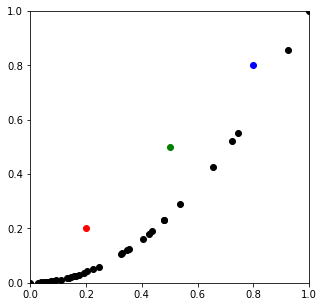

In [ ]:
np.random.seed(200)
k = 3
means = {1:[0.2,0.2],2:[0.5,0.5],3:[0.8,0.8]}   #Initial Centeroids
fig = plt.figure(figsize=(5, 5))
plt.scatter(data1['norm_sent_value'], data2['norm_value'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in means.keys():
    plt.scatter(*means[i], color=colmap[i])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

                     x                     y  distance_from_1  \
0   0.6541957293816668   0.42736849952996736         0.507927   
1   0.5373920257328703    0.2881269351302151         0.348712   
2   0.1737325459493865   0.02980001507976697         0.172215   
3  0.14598797175540926   0.02097986065132628         0.186991   
4  0.11044188037591404  0.011935297320269687         0.208300   

   distance_from_2  distance_from_3  closest color  
0         0.170445         0.400141        2     g  
1         0.215147         0.575306        2     g  
2         0.572310         0.992683        1     r  
3         0.595638         1.017155        1     r  
4         0.624470         1.047156        1     r  


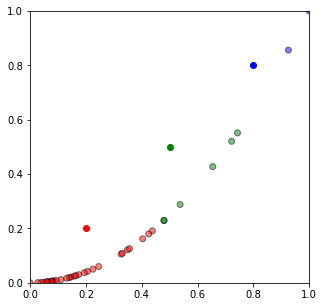

In [ ]:
def assignment(data1,data2,means):
    for i in means.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        cluster['distance_from_{}'.format(i)] = (
            np.sqrt(
                (data1['norm_sent_value'] - means[i][0]) ** 2
                + (data2['norm_value'] - means[i][1]) ** 2
            )
        )
    means_distance_cols = ['distance_from_{}'.format(i) for i in means.keys()]
    cluster['closest'] = cluster.loc[:, means_distance_cols].idxmin(axis=1)
    cluster['closest'] = cluster['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    cluster['color'] = cluster['closest'].map(lambda x: colmap[x])
    return cluster
cluster = assignment(data1,data2, means)
print(cluster.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(data1['norm_sent_value'], data2['norm_value'],color=cluster['color'], alpha=0.5, edgecolor='k')
for i in means.keys():
    plt.scatter(*means[i], color=colmap[i])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [ ]:
cluster.head(38)

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,0.6541957293816668,0.42736849952996736,0.612852,0.073931,0.588126,2,g
1,0.5373920257328703,0.2881269351302151,0.436289,0.108156,0.768396,2,g
2,0.1737325459493865,0.02980001507976697,0.016248,0.550176,1.195569,1,r
3,0.14598797175540926,0.02097986065132628,0.037906,0.577424,1.220597,1,r
4,0.11044188037591404,0.011935297320269687,0.072510,0.611244,1.251268,1,r
5,0.4794680735041407,0.2292237699355359,0.355815,0.190375,0.849659,2,g
6,0.08550059234014824,0.007101744037741231,0.097081,0.634287,1.271883,1,r
7,0.0794983954220272,0.006124758611587559,0.102983,0.639752,1.276736,1,r
8,0.3487158778750144,0.12099683784938105,0.189720,0.358720,1.014084,1,r
9,0.0756726102909007,0.0055397308910645655,0.106740,0.643219,1.279807,1,r


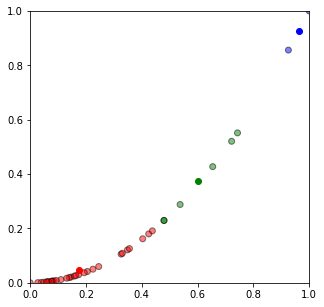

In [ ]:
#update old means
import copy

old_means = copy.deepcopy(means)
def update(k):
    for i in means.keys():
        x_cor=[]
        y_cor=[]
        type(i)
        for j in range(nums[0],nums[1]):
            if(int(str(cluster['closest'][j]))==i):
                x_cor.append(float(str(cluster['x'][j])))
                y_cor.append(float(str(cluster['y'][j])))
        means[i][0] = np.mean(x_cor)
        means[i][1] = np.mean(y_cor)
    return k

means = update(means)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(data1['norm_sent_value'], data2['norm_value'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in means.keys():
    plt.scatter(*means[i], color=colmap[i])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [ ]:
cluster = assignment(data1,data2,means)
cluster.head(38)

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,0.6541957293816668,0.42736849952996736,0.612852,0.073931,0.588126,2,g
1,0.5373920257328703,0.2881269351302151,0.436289,0.108156,0.768396,2,g
2,0.1737325459493865,0.02980001507976697,0.016248,0.550176,1.195569,1,r
3,0.14598797175540926,0.02097986065132628,0.037906,0.577424,1.220597,1,r
4,0.11044188037591404,0.011935297320269687,0.072510,0.611244,1.251268,1,r
5,0.4794680735041407,0.2292237699355359,0.355815,0.190375,0.849659,2,g
6,0.08550059234014824,0.007101744037741231,0.097081,0.634287,1.271883,1,r
7,0.0794983954220272,0.006124758611587559,0.102983,0.639752,1.276736,1,r
8,0.3487158778750144,0.12099683784938105,0.189720,0.358720,1.014084,1,r
9,0.0756726102909007,0.0055397308910645655,0.106740,0.643219,1.279807,1,r


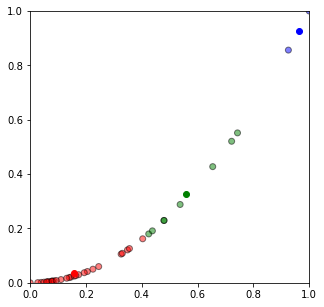

In [ ]:
# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(data1['norm_sent_value'], data2['norm_value'],color=cluster['color'], alpha=0.5, edgecolor='k')
for i in means.keys():
    plt.scatter(*means[i], color=colmap[i])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

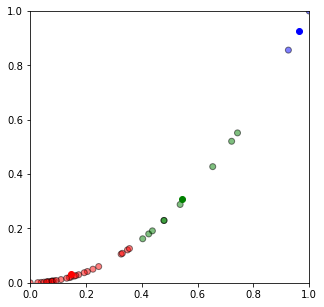

In [ ]:
while True:
    closest_centroids = cluster['closest'].copy(deep=True)
    means = update(means)
    cluster = assignment(data1,data2, means)
    if closest_centroids.equals(cluster['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(data1['norm_sent_value'], data2['norm_value'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in means.keys():
    plt.scatter(*means[i], color=colmap[i])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [ ]:
user_id=[3610511, 5656162, 5682702, 6015122, 6067292, 6134312, 6140012, 6684602, 7046912, 8072492, 8291932, 8858022, 8927532, 9011502, 9351052, 9564632, 9939012, 9993142, 10492262, 11176152, 13260592, 14057516, 14112759, 14492555, 14709812, 14865840, 14958182, 15016610, 15271419, 15391421, 15836275, 16043064, 16093829, 16591972, 16927266, 17654864, 17852114, 18173213, 18527544, 18671285, 18671285, 18735790, 18800245, 19598248, 20308222, 21102000, 21770069, 22015750, 22136015, 22203964, 22508731, 23748269, 24352106, 24510304, 25442408, 26771352, 27241975, 27422705, 27636956, 27887098, 28313453, 28342883, 28363979, 28845598, 29500667, 29510629, 29646177, 31102741, 31162918, 32025215, 32130104, 32204918, 33747826, 33950570, 34355343, 34897604, 35737313, 36381609, 36727238, 37539436, 37733715, 37889070, 37922072, 38002859, 38223194, 38730407, 38972677], 'retweet_count': [440295, 503248, 54850, 422569, 3541221, 45251, 1251049, 281945, 1484733, 467999, 1521, 895899, 686955, 259859, 61452, 2155460, 22181, 665726, 14093, 451174, 606491, 92775, 12097, 1107, 1063392, 24130, 230314, 796829, 58908, 3794, 5344489, 2557162, 247, 279566, 215836, 11091, 54934, 834, 1259937, 84025, 84025, 969228, 875076, 725395, 1726603, 30624406, 0, 2315362, 289726, 1554654, 3402908, 997427, 50700, 757962, 287339, 3217935, 6628143, 280622, 647546, 208635, 1099989, 1316201, 1574, 265846, 834230, 1088984, 110060, 31723, 381782, 10115, 1483083, 9122, 0, 4193121, 1625954, 1656002, 378888, 151744, 1930995, 1996198, 180841, 1448716, 270254, 59682, 1886398, 7987, 1423700]

SyntaxError: invalid syntax (<ipython-input-31-0ce6d83b898d>, line 1)